# Hierarchical Clustering

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.io import loadmat

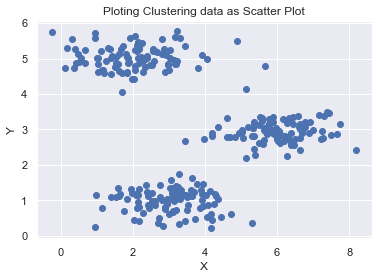

In [ ]:
data = loadmat('ex7data2.mat')
X = data['X']
sns.set()
_=plt.scatter( x=X[:, 0], y=X[:, 1]);
_=plt.xlabel("X")
_=plt.ylabel("Y")
_=plt.title("Ploting Clustering data as Scatter Plot")

## Step 1:  
**assign all the points to  an individual cluster:** 


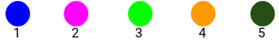

In [ ]:
def initialize(pionts):

    intial_clusters =[]
    {intial_clusters.append([i]) for i in range(0,pionts.shape[0]) } # it must depend on the len of X
    
    proximity_matrix = np.ones((pionts.shape[0],pionts.shape[0]))*np.inf
    
    return intial_clusters,proximity_matrix

intial_clusters,proximity_matrix=initialize(X)

print(proximity_matrix.shape)
len(intial_clusters)

(300, 300)


300

## Step 2:  
**look at the smallest distance in the matrix and merge the points with the smallest distance. We then update the proximity matrix**
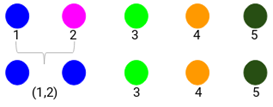

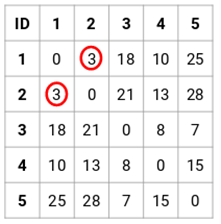

**Here, the smallest distance is 3 and hence we will merge point 1 and 2.**

In [ ]:
def calculate_dist(points,clusters,proximity_matrix,c1 = None, c2= None):
    """ calculate distance between each two point
        note : the value of [i,j] = [j,i] and diganol always zero so try to 
        calculate only the upper triangle of the matrix or the lower triangle 
        ,c1 = None, c2= None so we can use them in proximity_matrix update insted of calculateing the matrix each time
        c1,c2 are the keys of the cluster
    """ 
    #c1 and c2 are clusters numbers not index 
    
    if c1 != c2: 
        
        centerC1 = points[clusters[c2]].mean(axis = 0) 
        centerC2 = points[clusters[c1]].mean(axis = 0)
        distance = np.linalg.norm(centerC1-centerC2)
        """ use np.linalg.norm  insted
        a = X[intial_clusters[0]]
        b = X[intial_clusters[1]]
        print(a)
        print(b)
        c= b-a
        print(c)
        c =c**2
        print(np.sqrt(c.sum()))"""
        distance =proximity_matrix[c1][c2] = distance
        proximity_matrix[c2][c1] = distance
    return proximity_matrix

calculate_dist(X,intial_clusters,proximity_matrix,c1 =0, c2= 1)

array([[       inf, 3.82134983,        inf, ...,        inf,        inf,
               inf],
       [3.82134983,        inf,        inf, ...,        inf,        inf,
               inf],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf],
       ...,
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf]])

## Step 3: 
**We will repeat step 2 until only a single cluster is left.**
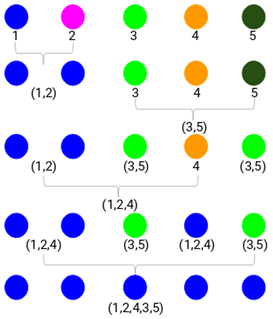


**Input: coordinates (x,y) pairs 
Output: Clustering step by step: Whenever two clusters are merged, will keep tack which clusters combined together**

  

In [ ]:
def merge_clusters(clusters,proximity_matrix):
    """ merge the two closest clusters
        i the clusters dictionary merge the values of the two clusters and remove the cluster with bigger num
        note:the length of the dictionary will decrease by 1 for each call
    """
    idx1 , idx2 = np.where(proximity_matrix ==proximity_matrix.min())[0]
    
    #print(f"Cluster1 : {idx1} ,Cluster2 : {idx2} ,min:{proximity_matrix[idx1,idx2]}")
    if idx2 < idx1: idx1,idx2 = idx2 ,idx1
    clusters[idx1] =clusters[idx1] + clusters[idx2]
    _=clusters.pop(idx2)
    proximity_matrix = np.delete(proximity_matrix,idx2,0)
    proximity_matrix = np.delete(proximity_matrix,idx2,1)
    print(f"merge Cluster1 : {idx1} and Cluster2 : {idx2}")
    return clusters ,proximity_matrix,idx1 # indces of the two merged clusters idx1,idx2 to use the in update_proximity_matrix

In [ ]:
intial_clusters,proximity_matrix=initialize(X)

calculate_dist(X,intial_clusters,proximity_matrix,c1 =0, c2= 2)
calculate_dist(X,intial_clusters,proximity_matrix,c1 =1, c2= 2)
calculate_dist(X,intial_clusters,proximity_matrix,c1 =2, c2= 3)
print("\n",proximity_matrix[:5,:5])
clusters ,proximity_matrix,idx1 = merge_clusters(intial_clusters,proximity_matrix)
print("\n",proximity_matrix[:5,:5])
print(proximity_matrix.shape)
print(len(intial_clusters))


 [[       inf        inf 4.69876033        inf        inf]
 [       inf        inf 1.66103637        inf        inf]
 [4.69876033 1.66103637        inf 3.6930404         inf]
 [       inf        inf 3.6930404         inf        inf]
 [       inf        inf        inf        inf        inf]]
merge Cluster1 : 1 and Cluster2 : 2

 [[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
(299, 299)
299


In [ ]:
def update_proximity_matrix(points,clusters,proximity_matrix,c1):
    """ after merge change the proximity_matrix by update the distance of merged clusters and remove the remove 
    the cluster with bigger num
    note:the shape of the proximity_matrix will decrease by 1 for each call , where proximity_matrix square matrix always 
    """
    for c2 in range(proximity_matrix.shape[0]):
        calculate_dist(points,clusters,proximity_matrix,c1 , c2)
    return proximity_matrix

In [ ]:
intial_clusters,proximity_matrix=initialize(X)

calculate_dist(X,intial_clusters,proximity_matrix,c1 =0, c2= 1)
calculate_dist(X,intial_clusters,proximity_matrix,c1 =1, c2= 2)
calculate_dist(X,intial_clusters,proximity_matrix,c1 =2, c2= 3)
print("--------------",proximity_matrix[1,:5])
print("\n",proximity_matrix[:5,:5])

clusters ,proximity_matrix,idx1 = merge_clusters(intial_clusters,proximity_matrix)

print("\n",proximity_matrix[:5,:5])
print("--------------",proximity_matrix[1,:5])
print(intial_clusters[1])



update_proximity_matrix(X,intial_clusters,proximity_matrix,idx1)

print("\n",proximity_matrix[:5,:5])
print("--------------",proximity_matrix[1,:5])
print(intial_clusters[1])
print(proximity_matrix.shape)



-------------- [3.82134983        inf 1.66103637        inf        inf]

 [[       inf 3.82134983        inf        inf        inf]
 [3.82134983        inf 1.66103637        inf        inf]
 [       inf 1.66103637        inf 3.6930404         inf]
 [       inf        inf 3.6930404         inf        inf]
 [       inf        inf        inf        inf        inf]]
merge Cluster1 : 1 and Cluster2 : 2

 [[       inf 3.82134983        inf        inf        inf]
 [3.82134983        inf        inf        inf        inf]
 [       inf        inf        inf        inf        inf]
 [       inf        inf        inf        inf        inf]
 [       inf        inf        inf        inf        inf]]
-------------- [3.82134983        inf        inf        inf        inf]
[1, 2]

 [[       inf 4.20128208        inf        inf        inf]
 [4.20128208        inf 3.15292859 2.91427012 4.83968589]
 [       inf 3.15292859        inf        inf        inf]
 [       inf 2.91427012        inf        inf      

In [ ]:
def history(clusters,proximity_matrix):
    """make history for each itteration to keep track of which to clusters merged on each itteration
    """
    
    
    return proximity_matrix

In [ ]:
def Hierarchical(x,func= None):
    """
    perform all steps requered to run Hierarchical clustering
    func : advanced option 
    """
    clusters,proximity_matrix=initialize(x)
    for c1 in range(0,proximity_matrix.shape[0]):
        for c2 in range(0,c1):
            calculate_dist(x,clusters,proximity_matrix,c1 , c2)
    while len(clusters)> 1:
       
        clusters ,proximity_matrix,idx1 = merge_clusters(clusters,proximity_matrix)
        update_proximity_matrix(X,clusters, proximity_matrix,idx1)



        
    return proximity_matrix ,clusters


In [ ]:
proximity_matrix ,clusters =Hierarchical(X)



merge Cluster1 : 200 and Cluster2 : 252
merge Cluster1 : 36 and Cluster2 : 98
merge Cluster1 : 224 and Cluster2 : 241
merge Cluster1 : 147 and Cluster2 : 152
merge Cluster1 : 137 and Cluster2 : 183
merge Cluster1 : 0 and Cluster2 : 87
merge Cluster1 : 149 and Cluster2 : 177
merge Cluster1 : 2 and Cluster2 : 247
merge Cluster1 : 146 and Cluster2 : 185
merge Cluster1 : 13 and Cluster2 : 25
merge Cluster1 : 115 and Cluster2 : 139
merge Cluster1 : 68 and Cluster2 : 72
merge Cluster1 : 115 and Cluster2 : 166
merge Cluster1 : 27 and Cluster2 : 71
merge Cluster1 : 241 and Cluster2 : 271
merge Cluster1 : 37 and Cluster2 : 71
merge Cluster1 : 188 and Cluster2 : 209
merge Cluster1 : 8 and Cluster2 : 9
merge Cluster1 : 203 and Cluster2 : 252
merge Cluster1 : 182 and Cluster2 : 184
merge Cluster1 : 196 and Cluster2 : 229
merge Cluster1 : 36 and Cluster2 : 56
merge Cluster1 : 106 and Cluster2 : 176
merge Cluster1 : 122 and Cluster2 : 123
merge Cluster1 : 75 and Cluster2 : 87
merge Cluster1 : 203 an

merge Cluster1 : 4 and Cluster2 : 12
merge Cluster1 : 51 and Cluster2 : 55
merge Cluster1 : 25 and Cluster2 : 27
merge Cluster1 : 25 and Cluster2 : 36
merge Cluster1 : 7 and Cluster2 : 13
merge Cluster1 : 7 and Cluster2 : 13
merge Cluster1 : 21 and Cluster2 : 28
merge Cluster1 : 9 and Cluster2 : 14
merge Cluster1 : 55 and Cluster2 : 56
merge Cluster1 : 29 and Cluster2 : 36
merge Cluster1 : 25 and Cluster2 : 39
merge Cluster1 : 31 and Cluster2 : 36
merge Cluster1 : 41 and Cluster2 : 49
merge Cluster1 : 12 and Cluster2 : 14
merge Cluster1 : 23 and Cluster2 : 30
merge Cluster1 : 27 and Cluster2 : 34
merge Cluster1 : 27 and Cluster2 : 35
merge Cluster1 : 8 and Cluster2 : 14
merge Cluster1 : 25 and Cluster2 : 32
merge Cluster1 : 36 and Cluster2 : 40
merge Cluster1 : 2 and Cluster2 : 37
merge Cluster1 : 36 and Cluster2 : 37
merge Cluster1 : 7 and Cluster2 : 11
merge Cluster1 : 8 and Cluster2 : 14
merge Cluster1 : 17 and Cluster2 : 30
merge Cluster1 : 32 and Cluster2 : 43
merge Cluster1 : 16 

In [ ]:
print(proximity_matrix.shape) 
print(len(clusters))

(1, 1)
1
